In [4]:
# Importing Packages
import numpy as np
from matplotlib import pyplot
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train.shape, y_train.shape, "____" , X_test.shape, y_test.shape
((60000, 28, 28), (60000,), '____', (10000, 28, 28), (10000,))
X_train[0]

4422102/4422102 [==============================] - 1s 0us/step


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
class_labels = ["Trouser", "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker",]
class_labels

['Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker']

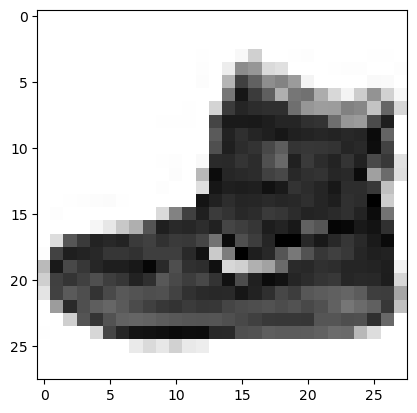

In [7]:
plt.imshow(X_train[0] , cmap="Greys")

In [8]:
X_train.ndim

3

In [9]:
X_train = np.expand_dims(X_train, -1)
X_test =np.expand_dims(X_test, -1)

In [10]:
X_train.ndim

4

In [11]:
X_train =X_train/255
X_test = X_test/255

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train)

In [13]:
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((45000, 28, 28, 1), (45000,), (15000, 28, 28, 1), (15000,))

In [14]:
cnn = keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=32, kernel_size=3,strides=(1,1),padding='valid', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,strides=(2,2),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [15]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=20 , batch_size=16 , verbose=1 , validation_data=(X_validation, y_validation))

Epoch 1/20
2813/2813 [==============================] - 52s 17ms/step - loss: 0.5744 - accuracy: 0.7856 - val_loss: 0.3783 - val_accuracy: 0.8611
Epoch 2/20
2813/2813 [==============================] - 48s 17ms/step - loss: 0.3739 - accuracy: 0.8627 - val_loss: 0.3263 - val_accuracy: 0.8807
Epoch 3/20
2813/2813 [==============================] - 48s 17ms/step - loss: 0.3272 - accuracy: 0.8802 - val_loss: 0.3127 - val_accuracy: 0.8839
Epoch 4/20
2813/2813 [==============================] - 47s 17ms/step - loss: 0.2993 - accuracy: 0.8900 - val_loss: 0.3058 - val_accuracy: 0.8878
Epoch 5/20
2813/2813 [==============================] - 48s 17ms/step - loss: 0.2760 - accuracy: 0.8973 - val_loss: 0.3108 - val_accuracy: 0.8832
Epoch 6/20
2813/2813 [==============================] - 49s 17ms/step - loss: 0.2611 - accuracy: 0.9040 - val_loss: 0.2782 - val_accuracy: 0.8995
Epoch 7/20
2813/2813 [==============================] - 49s 17ms/step - loss: 0.2476 - accuracy: 0.9092 - val_loss: 0.2932 -

In [17]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 3s 9ms/step


In [18]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.3499 - accuracy: 0.8961


[0.3499019145965576, 0.8960999846458435]

In [ ]:
plt.figure(figs

Text(0.5, 1.0, 'Pullover / 1')

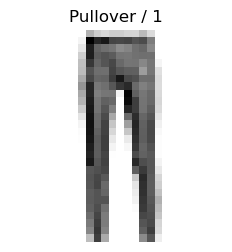

In [20]:
ize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
 plt.subplot(5,5,j)
j+=1
plt.imshow(X_train[i],cmap="Greys")
plt.axis('off')
plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

Text(0.5, 1.0, 'Trouser / 0')

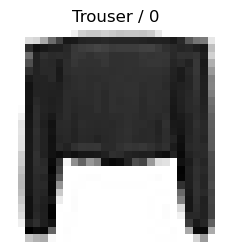

In [21]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
 plt.subplot(5,5,j)
j+=1
plt.imshow(X_train[i],cmap="Greys")
plt.axis('off')
plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

Text(0.5, 1.0, 'Pullover / 1')

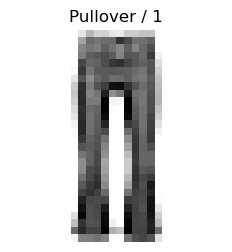

In [32]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
 plt.subplot(5,5,j)
j+=1
plt.imshow(X_train[i],cmap="Greys")
plt.axis('off')
plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))